In [1]:
from dataset.mnist import load_mnist
from common.util import *

(x_train, t_train), (x_test, t_text) = load_mnist()

# 훈련 데이터를 뒤섞는다. (데이터가 정령되어 있을수도 있으므로)
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [2]:
import numpy as np

val acc:0.14 | lr:7.923957137966902e-05, weight decay:3.718145899785843e-05
val acc:0.4 | lr:0.0037330232393752087, weight decay:4.873531329447148e-07
val acc:0.09 | lr:1.5924260851947018e-06, weight decay:3.8094104237893823e-06
val acc:0.06 | lr:7.386263864980695e-05, weight decay:6.26120781410701e-05
val acc:0.14 | lr:0.00025578409460566657, weight decay:8.049162750931405e-06
val acc:0.18 | lr:9.839235135789672e-05, weight decay:8.253173969863198e-06
val acc:0.12 | lr:1.3069763730789103e-06, weight decay:1.9368726011355188e-07
val acc:0.14 | lr:0.00010559581097976066, weight decay:3.258278369296532e-08
val acc:0.59 | lr:0.00588162106792145, weight decay:4.9628556290554225e-06
val acc:0.09 | lr:4.304499819996284e-05, weight decay:5.7261843456227824e-06
val acc:0.15 | lr:0.00034094127638683284, weight decay:1.7103977824776996e-08
val acc:0.54 | lr:0.0029337147982306, weight decay:2.4381418286445063e-07
val acc:0.1 | lr:1.1136612793677414e-05, weight decay:1.493756367092077e-06
val acc:

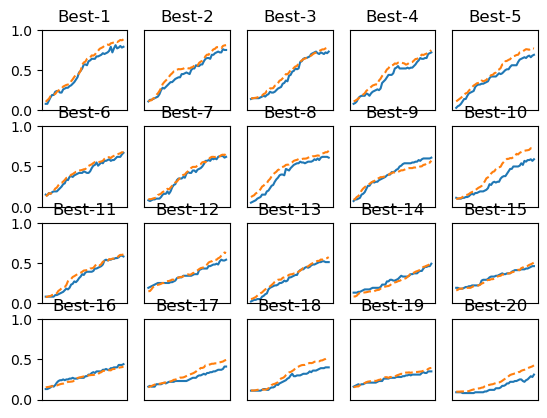

In [28]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()